In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

# After downloading Air-Pollution-Image-Dataset-From-India-and-Nepal dataset from kaggle, extract it and pass the path for all the respective csv file for training, validation and test.

In [2]:
# Specify the file paths for the training, validation, and testing CSV files
train_csv_file = '/kaggle/input/air-pollution-image-dataset-from-india-and-nepal/Dataset_for_AQI_Classification/Dataset_for_AQI_Classification/train_data.csv'  # Replace with the path to your training CSV file
val_csv_file = '/kaggle/input/air-pollution-image-dataset-from-india-and-nepal/Dataset_for_AQI_Classification/Dataset_for_AQI_Classification/val_data.csv'  # Replace with the path to your validation CSV file
test_csv_file = '/kaggle/input/air-pollution-image-dataset-from-india-and-nepal/Dataset_for_AQI_Classification/Dataset_for_AQI_Classification/testing_data.csv'  # Replace with the path to your testing CSV file


In [3]:
# Read the training CSV file into a DataFrame
train_df = pd.read_csv(train_csv_file)
train_df.head()

,Location,Filename,Year,Month,Day,Hour,AQI,PM2.5,PM10,O3,CO,SO2,NO2,AQI_Class
0,Tamil Nadu,TN_UnFSG_2023-03-02-08.30-1.jpg,2023,3,2,8:30,119,69.00,106.00,8.00,358.00,22.0,26.00,c_Unhealthy_for_Sensitive_Groups
1,Bengaluru,BENGR_Mod_2023-02-24-08.30-1-166.jpg,2023,2,24,8:30,68,32.00,61.00,26.00,228.00,5.0,21.00,b_Moderate
2,"Biratnagar, Nepal",BIR_UNFSG_VF_2023-02-03-15.00-2-24.jpg,2023,2,3,15:00,141,47.96,68.92,65.57,0.41,2.8,2.51,c_Unhealthy_for_Sensitive_Groups
3,Mumbai,MH_UnFSG_2023-03-10-16.00-1-76.jpg,2023,3,10,16:00,141,72.00,108.00,NaN,NaN,NaN,63.00,c_Unhealthy_for_Sensitive_Groups
4,"ITO, Delhi",DEL_SEV_2023-02-07-14.00-2-8.jpg,2023,2,7,14:00,449,337.00,198.00,23.00,24.00,13.0,57.00,f_Severe


In [4]:
# Read the validation CSV file into a DataFrame
val_df = pd.read_csv(val_csv_file)
val_df.head()

,Location,Filename,Year,Month,Day,Hour,AQI,PM2.5,PM10,O3,CO,SO2,NO2,AQI_Class
0,Bengaluru,BENGR_Mod_2023-02-23-08.30-1-401.jpg,2023,2,23,8:30,97,43.0,78.0,26.0,258.0,10.0,17.0,b_Moderate
1,"ITO, Delhi",DEL_SEV_2023-02-22-14.00-2-221.jpg,2023,2,22,14:00,450,500.0,480.0,91.0,78.0,17.0,47.0,f_Severe
2,"New Ind Town, Faridabad",HAR_VUN_2022-10-02-10.00-1-2361.jpg,2022,10,2,10:00,230,185.0,199.0,10.0,52.0,12.0,26.0,e_Very_Unhealthy
3,"ITO, Delhi",DEL_VUnH_2023-02-16-14.00-2-7.jpg,2023,2,16,14:00,268,401.0,325.0,73.0,88.0,16.0,NaN,e_Very_Unhealthy
4,Mumbai,MH_Good_2023-03-23-17.00-2.jpg,2023,3,23,17:00,47,14.0,41.0,35.0,6.0,5.0,7.0,a_Good


In [5]:
# Read the testing CSV file into a DataFrame
test_df = pd.read_csv(test_csv_file)
test_df.head()

,Location,Filename,Year,Month,Day,Hour,AQI,PM2.5,PM10,O3,CO,SO2,NO2,AQI_Class
0,"Biratnagar, Nepal",BRI_Un_2023-02-02- 12.00-9.jpg,2023,2,2,12:00,158,70.08,100.82,58.89,0.49,4.4,1.04,d_Unhealthy
1,"Biratnagar, Nepal",BIR_UNH_VF_2023-02-02- 12.00-3-72.jpg,2023,2,2,12:00,158,70.08,100.82,58.89,0.49,4.4,1.04,d_Unhealthy
2,"Biratnagar, Nepal",BIR_UNH_VF_2023-02-02- 12.00-3-71.jpg,2023,2,2,12:00,158,70.08,100.82,58.89,0.49,4.4,1.04,d_Unhealthy
3,"Biratnagar, Nepal",BIR_UNH_VF_2023-02-02- 12.00-3-65.jpg,2023,2,2,12:00,158,70.08,100.82,58.89,0.49,4.4,1.04,d_Unhealthy
4,"Biratnagar, Nepal",BIR_UNH_VF_2023-02-02- 12.00-3-56.jpg,2023,2,2,12:00,158,70.08,100.82,58.89,0.49,4.4,1.04,d_Unhealthy


In [6]:
# Create ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)

In [7]:
# Create data generators
train_generator = datagen.flow_from_dataframe(
    train_df,
    directory="/kaggle/input/air-pollution-image-dataset-from-india-and-nepal/Air Pollution Image Dataset/Air Pollution Image Dataset/Combined_Dataset/All_img",                             # Change the directory to your downloaded dataset path
    x_col='Filename',
    y_col='AQI_Class',
    target_size=(224, 224),
    class_mode='categorical'
)

val_generator = datagen.flow_from_dataframe(
    val_df,
    directory="/kaggle/input/air-pollution-image-dataset-from-india-and-nepal/Air Pollution Image Dataset/Air Pollution Image Dataset/Combined_Dataset/All_img",                             # Change the directory to your downloaded dataset path
    x_col='Filename',
    y_col='AQI_Class',
    target_size=(224, 224),
    class_mode='categorical'
)

test_generator = datagen.flow_from_dataframe(
    test_df,
    directory="/kaggle/input/air-pollution-image-dataset-from-india-and-nepal/Air Pollution Image Dataset/Air Pollution Image Dataset/Combined_Dataset/All_img",                             # Change the directory to your downloaded dataset path
    x_col='Filename',
    y_col='AQI_Class',
    target_size=(224, 224),
    class_mode='categorical'
)

Found 7833 validated image filenames belonging to 6 classes.
Found 1959 validated image filenames belonging to 6 classes.
Found 2448 validated image filenames belonging to 6 classes.


# write your code here to create and train your model for image classificatoin for AQI class

In [20]:
#define your model heder

pre_trained_model  = tf.keras.applications.VGG16(input_shape=(224, 224, 3), include_top=False, weights="imagenet")

for layer in pre_trained_model.layers:
    layer.trainable = False
    
x1 = Flatten()(pre_trained_model.output)
fc1 = Dense(512, activation = 'relu')(x1)
fc2 = Dense(512, activation = 'relu')(fc1)
x = Dense(6, activation='linear')(fc2)  # activation function
model = Model(pre_trained_model.input, x)

# model = tf.keras.Sequential([
#     tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
#     tf.keras.layers.MaxPooling2D((2, 2)),
#     tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
#     tf.keras.layers.MaxPooling2D((2, 2)),
#     tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
#     tf.keras.layers.MaxPooling2D((2, 2)),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(6, activation='softmax')  # Adjust the number of output classes accordingly
# ])

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [26]:
#compile your model here

opt = tf.keras.optimizers.Adam(lr=0.001)  #!!!
model.compile(loss='mse', optimizer=opt, metrics=['accuracy'])  # loss function

# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [27]:
#train you model here

checkpoint_path = 'checkpoint.h5'
checkpoint_callback = ModelCheckpoint(checkpoint_path, save_best_only=True)

history = model.fit(
        train_generator,
        batch_size=16,
        steps_per_epoch=150,
        epochs=150,
        validation_data=val_generator,
        callbacks=[checkpoint_callback])


Epoch 1/150
150/150 [==============================] - 18s 110ms/step - loss: 0.2340 - accuracy: 0.6835 - val_loss: 0.0629 - val_accuracy: 0.7841
Epoch 2/150
150/150 [==============================] - 17s 112ms/step - loss: 0.0514 - accuracy: 0.8469 - val_loss: 0.0470 - val_accuracy: 0.8719
Epoch 3/150
150/150 [==============================] - 17s 111ms/step - loss: 0.0405 - accuracy: 0.9030 - val_loss: 0.0395 - val_accuracy: 0.8882
Epoch 4/150
150/150 [==============================] - 16s 104ms/step - loss: 0.0331 - accuracy: 0.9299 - val_loss: 0.0414 - val_accuracy: 0.8836
Epoch 5/150
150/150 [==============================] - 18s 117ms/step - loss: 0.0262 - accuracy: 0.9492 - val_loss: 0.0287 - val_accuracy: 0.9234
Epoch 6/150
150/150 [==============================] - 17s 116ms/step - loss: 0.0216 - accuracy: 0.9570 - val_loss: 0.0260 - val_accuracy: 0.9326
Epoch 7/150
150/150 [==============================] - 17s 112ms/step - loss: 0.0163 - accuracy: 0.9696 - val_loss: 0.0230 -

# plot your Training Accuracy and validation accuracy here

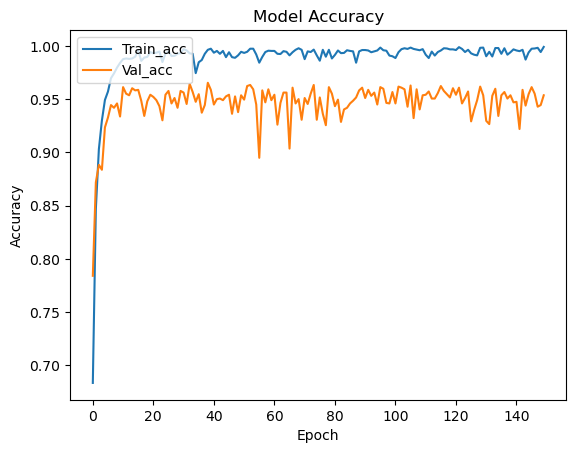

In [28]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train_acc', 'Val_acc'], loc='upper left')
plt.show()

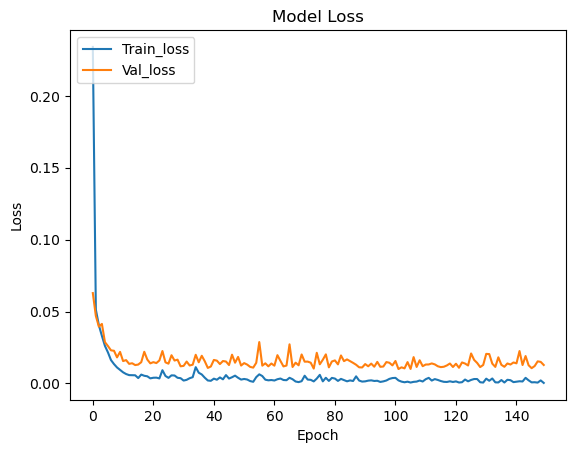

In [29]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train_loss', 'Val_loss'], loc='upper left')
plt.show()

# Test your test data and save your result file in this format and upload your solution file on kaggle competition

In [30]:
test_probabilities = model.predict(test_generator)
test_filenames = test_generator.filenames
test_probabilities_df = pd.DataFrame(test_probabilities, columns=['a_Good', 'b_Moderate', 
                                                                  'c_Unhealthy_for_Sensitive_Groups', 'd_Unhealthy', 
                                                                  'e_Very_Unhealthy', 'f_Severe'])
test_probabilities_df.insert(0, 'Filename', test_filenames)
test_probabilities_df.to_csv('test_results.csv', index=False)


77/77 [==============================] - 6s 71ms/step


In [31]:
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_generator)

# Generate predictions for the test data
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)  # Convert predictions to class labels

# Get the true labels and predicted probabilities
y_true = test_generator.classes
y_pred_prob = model.predict(test_generator)

# Calculate the F1 score for each class
f1_scores = f1_score(y_true, y_pred, average=None)


77/77 [==============================] - 6s 82ms/step


In [32]:
# Calculate the F1 score for each class
f1_scores = f1_score(y_true, y_pred, average=None)

# Calculate the average F1 score
average_f1_score = f1_score(y_true, y_pred, average='macro')

# Print the F1 scores for each class
for i, f1 in enumerate(f1_scores):
    print("Class {}: F1 Score = {:.4f}".format(i, f1))

# Print the average F1 score
print("Average F1 Score: {:.4f}".format(average_f1_score))
print()
print("Test Accuracy: {:.4f}".format(test_accuracy))

Class 0: F1 Score = 0.1614
Class 1: F1 Score = 0.1254
Class 2: F1 Score = 0.2451
Class 3: F1 Score = 0.2149
Class 4: F1 Score = 0.1440
Class 5: F1 Score = 0.0862
Average F1 Score: 0.1628

Test Accuracy: 0.9812


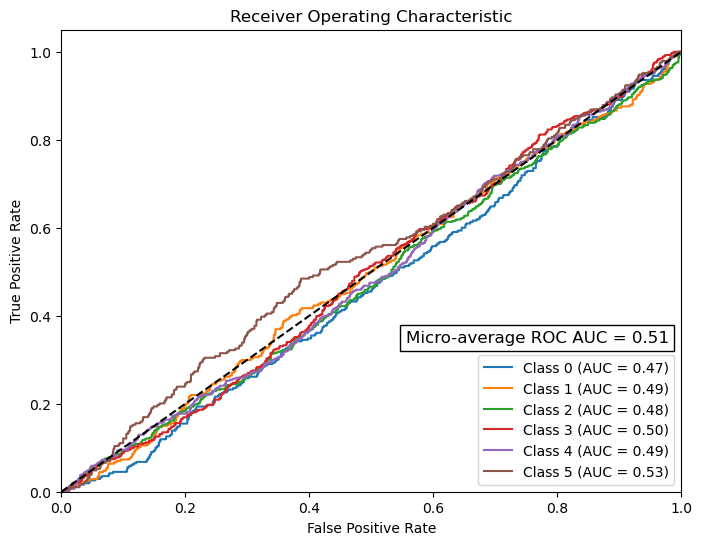

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize the true labels
y_true_binarized = label_binarize(y_true, classes=list(range(len(test_generator.class_indices))))

# Calculate the ROC AUC score for each class
roc_auc_scores = roc_auc_score(y_true_binarized, y_pred_prob, average='micro')

# Plot the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(test_generator.class_indices)):
    fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_pred_prob[:, i])
    roc_auc[i] = roc_auc_score(y_true_binarized[:, i], y_pred_prob[:, i])

# Plot the ROC curves
plt.figure(figsize=(8, 6))
for i in range(len(test_generator.class_indices)):
    plt.plot(fpr[i], tpr[i], label='Class %d (AUC = %0.2f)' % (i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')  # Plot the random chance curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Add micro-average ROC AUC score to the plot
plt.text(0.555, 0.34, 'Micro-average ROC AUC = %0.2f' % roc_auc_scores, fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))

plt.show()


In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, confusion_matrix

# Generate predictions for the training data
train_pred = model.predict(train_generator)
train_pred = np.argmax(train_pred, axis=1)  # Convert predictions to class labels

# Generate predictions for the validation data
val_pred = model.predict(val_generator)
val_pred = np.argmax(val_pred, axis=1)  # Convert predictions to class labels

# Generate predictions for the testing data
test_pred = model.predict(test_generator)
test_pred = np.argmax(test_pred, axis=1)  # Convert predictions to class labels

# Calculate overall MAE and RMSE
train_mae = mean_absolute_error(train_generator.classes, train_pred)
train_rmse = np.sqrt(mean_squared_error(train_generator.classes, train_pred))

val_mae = mean_absolute_error(val_generator.classes, val_pred)
val_rmse = np.sqrt(mean_squared_error(val_generator.classes, val_pred))

test_mae = mean_absolute_error(test_generator.classes, test_pred)
test_rmse = np.sqrt(mean_squared_error(test_generator.classes, test_pred))

print("Overall MAE - Training: {:.4f}".format(train_mae))
print("Overall RMSE - Training: {:.4f}".format(train_rmse))
print("Overall MAE - Validation: {:.4f}".format(val_mae))
print("Overall RMSE - Validation: {:.4f}".format(val_rmse))
print("Overall MAE - Testing: {:.4f}".format(test_mae))
print("Overall RMSE - Testing: {:.4f}".format(test_rmse))

77/77 [==============================] - 6s 72ms/step
Overall MAE - Training: 1.7365
Overall RMSE - Training: 2.1614
Overall MAE - Validation: 1.7346
Overall RMSE - Validation: 2.1847
Overall MAE - Testing: 1.7226
Overall RMSE - Testing: 2.1547


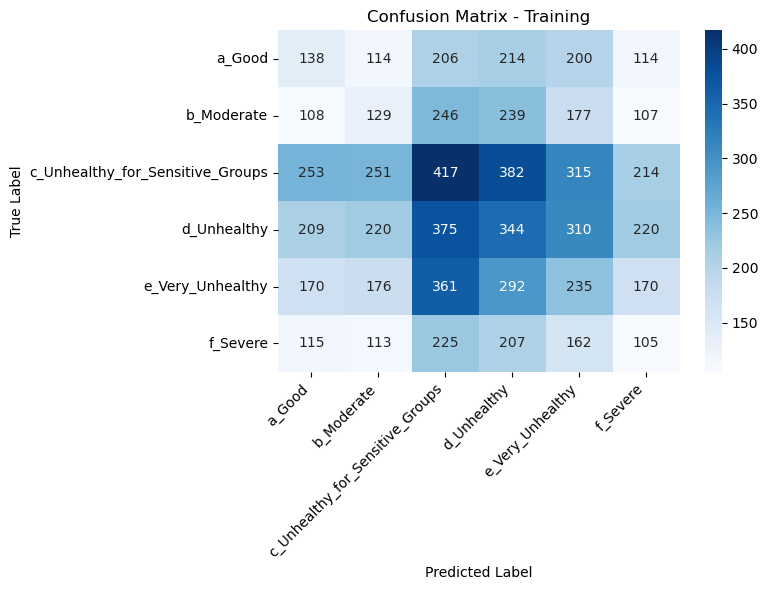

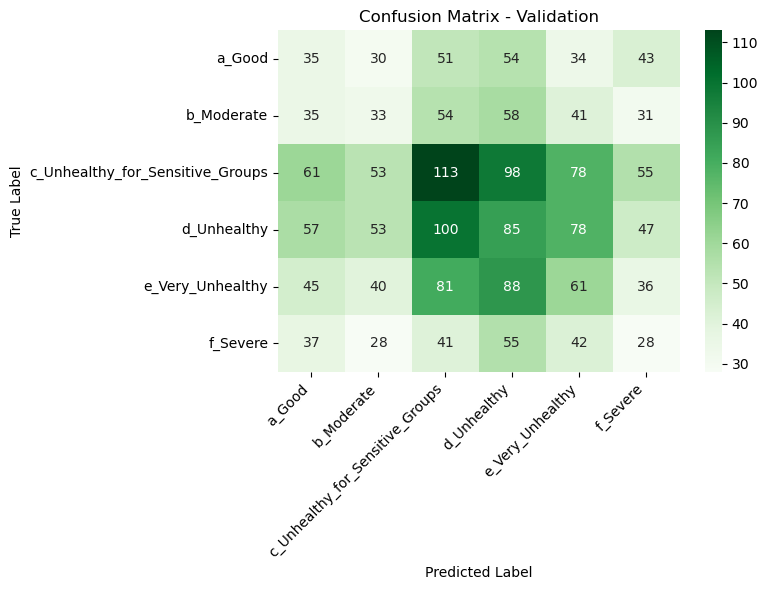

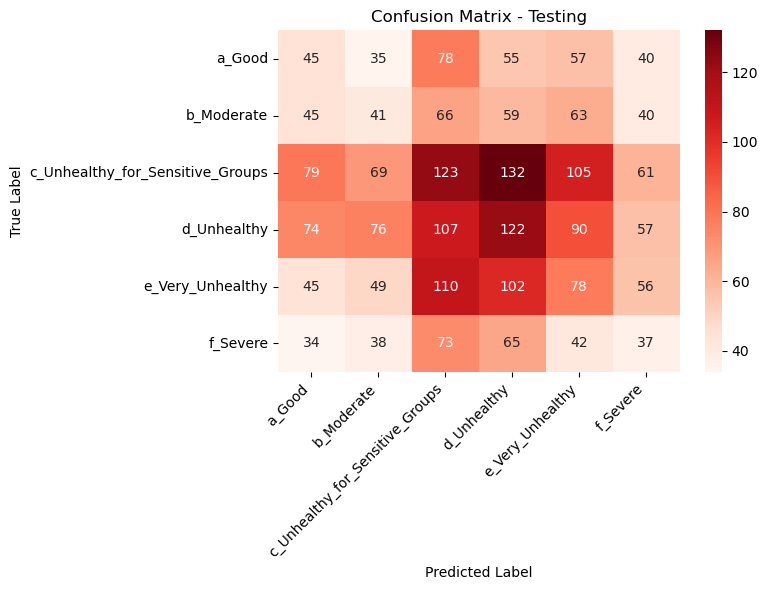

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrices
train_cm = confusion_matrix(train_generator.classes, train_pred)
val_cm = confusion_matrix(val_generator.classes, val_pred)
test_cm = confusion_matrix(test_generator.classes, test_pred)

# Define class labels
class_labels = list(test_generator.class_indices.keys())

# Plot confusion matrix for training set
plt.figure(figsize=(8, 6))
sns.heatmap(train_cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix - Training')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot confusion matrix for validation set
plt.figure(figsize=(8, 6))
sns.heatmap(val_cm, annot=True, cmap='Greens', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix - Validation')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot confusion matrix for testing set
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, cmap='Reds', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix - Testing')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
